<a href="https://colab.research.google.com/github/YuvrajKhade/CodeAI-x-Microsoft-ReSkill-Internship/blob/main/Project%202%3A%20%20Using%20Advanced%20excel%20and%20%20power%20bi%20analize%20whatsapp%20%20data/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/study_performance.csv')

In [ ]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
print(data.isnull().sum())


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Display the first few rows after encoding
print(data.head())

   gender  race_ethnicity  parental_level_of_education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test_preparation_course  math_score  reading_score  writing_score  
0                        1          72             72             74  
1                        0          69             90             88  
2                        1          90             95             93  
3                        1          47             57             44  
4                        1          76             78             75  


In [ ]:
print(data.describe())


            gender  race_ethnicity  parental_level_of_education        lunch  \
count  1000.000000     1000.000000                  1000.000000  1000.000000   
mean      0.482000        2.174000                     2.486000     0.645000   
std       0.499926        1.157179                     1.829522     0.478753   
min       0.000000        0.000000                     0.000000     0.000000   
25%       0.000000        1.000000                     1.000000     0.000000   
50%       0.000000        2.000000                     2.000000     1.000000   
75%       1.000000        3.000000                     4.000000     1.000000   
max       1.000000        4.000000                     5.000000     1.000000   

       test_preparation_course  math_score  reading_score  writing_score  
count              1000.000000  1000.00000    1000.000000    1000.000000  
mean                  0.642000    66.08900      69.169000      68.054000  
std                   0.479652    15.16308      14.600

In [ ]:
corr_matrix = data.corr()
print(corr_matrix)

                               gender  race_ethnicity  \
gender                       1.000000       -0.001502   
race_ethnicity              -0.001502        1.000000   
parental_level_of_education  0.001913       -0.031946   
lunch                        0.021372        0.046563   
test_preparation_course     -0.006028       -0.017508   
math_score                   0.167982        0.216415   
reading_score               -0.244313        0.145253   
writing_score               -0.301225        0.165691   

                             parental_level_of_education     lunch  \
gender                                          0.001913  0.021372   
race_ethnicity                                 -0.031946  0.046563   
parental_level_of_education                     1.000000  0.006320   
lunch                                           0.006320  1.000000   
test_preparation_course                        -0.023968  0.017044   
math_score                                     -0.068279  0.350877

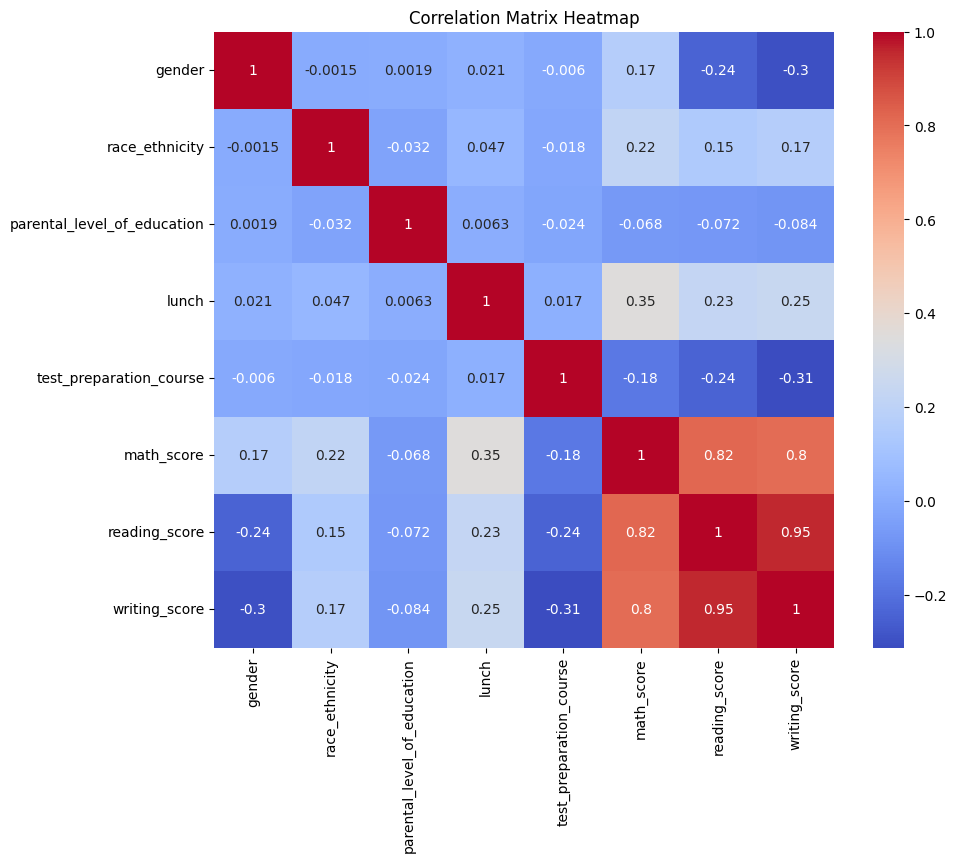

In [ ]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


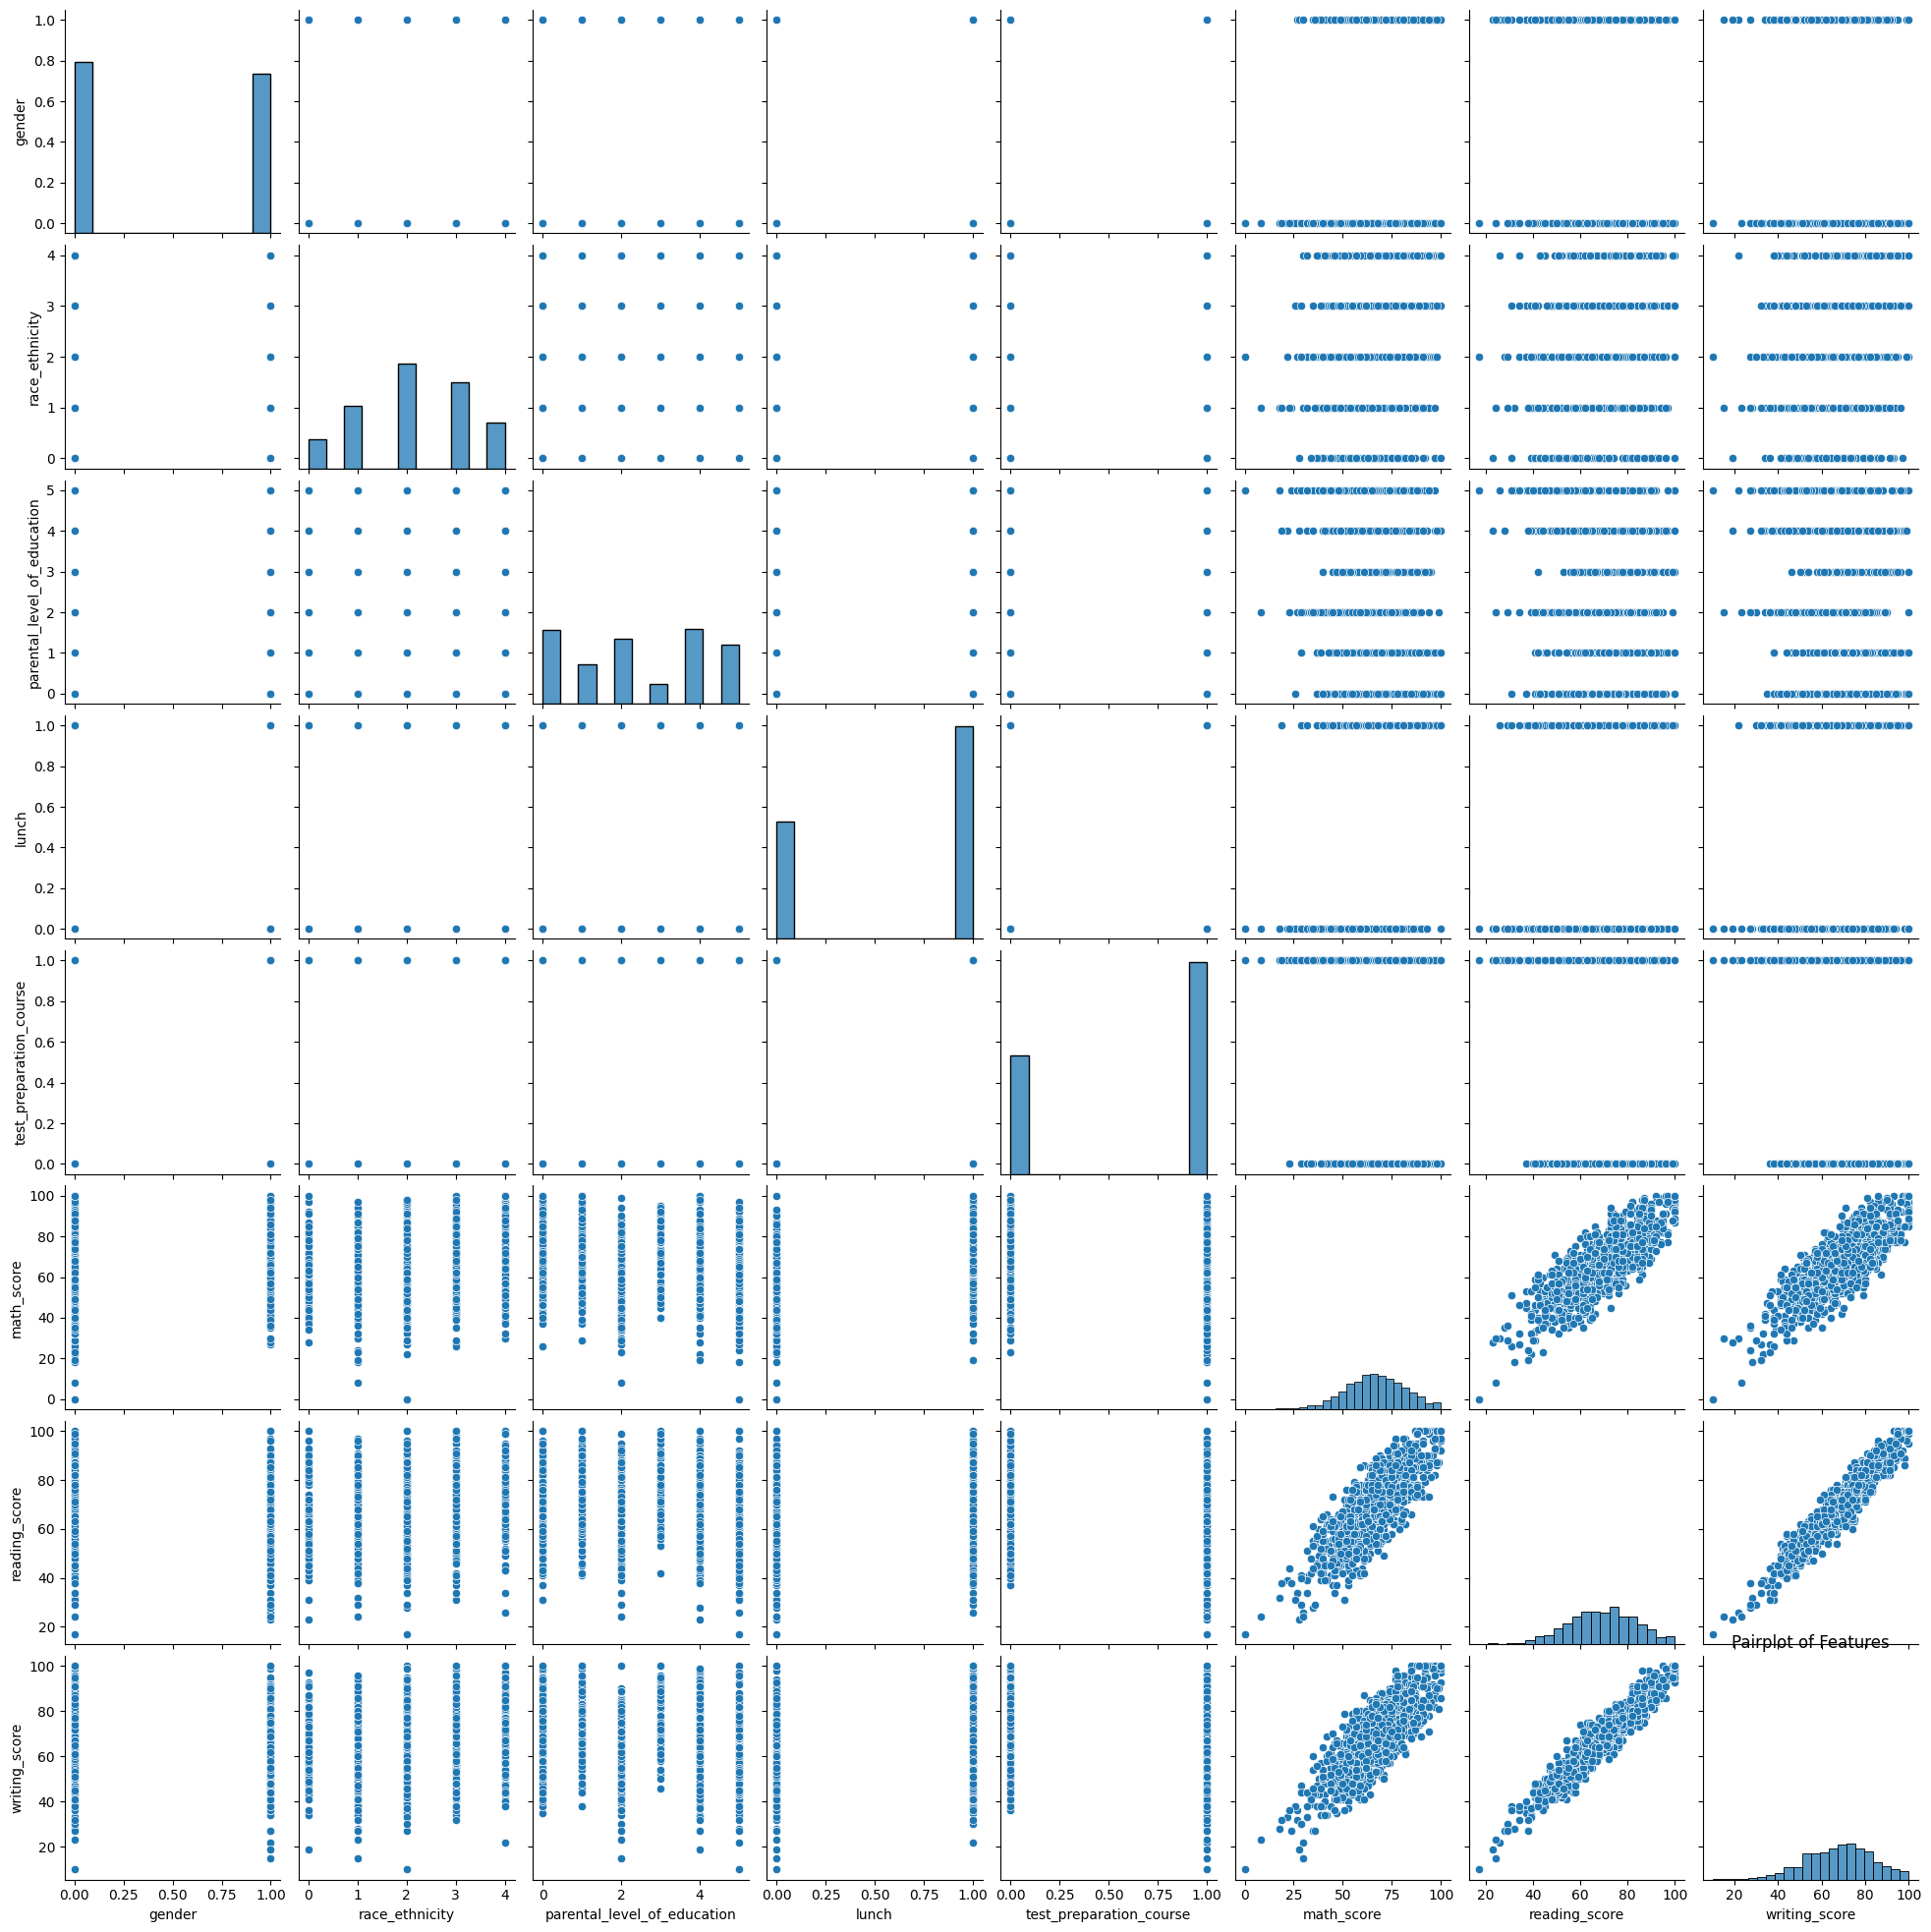

In [ ]:
# Pairplot to visualize relationships
sns.pairplot(data)
plt.title('Pairplot of Features')
plt.show()

<ipython-input-20-0d3f4edd5b41>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column,palette='deep')
<ipython-input-20-0d3f4edd5b41>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column,palette='deep')
<ipython-input-20-0d3f4edd5b41>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column,palette='deep')
<ipython-input-20-0d3f4edd5b41>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=F

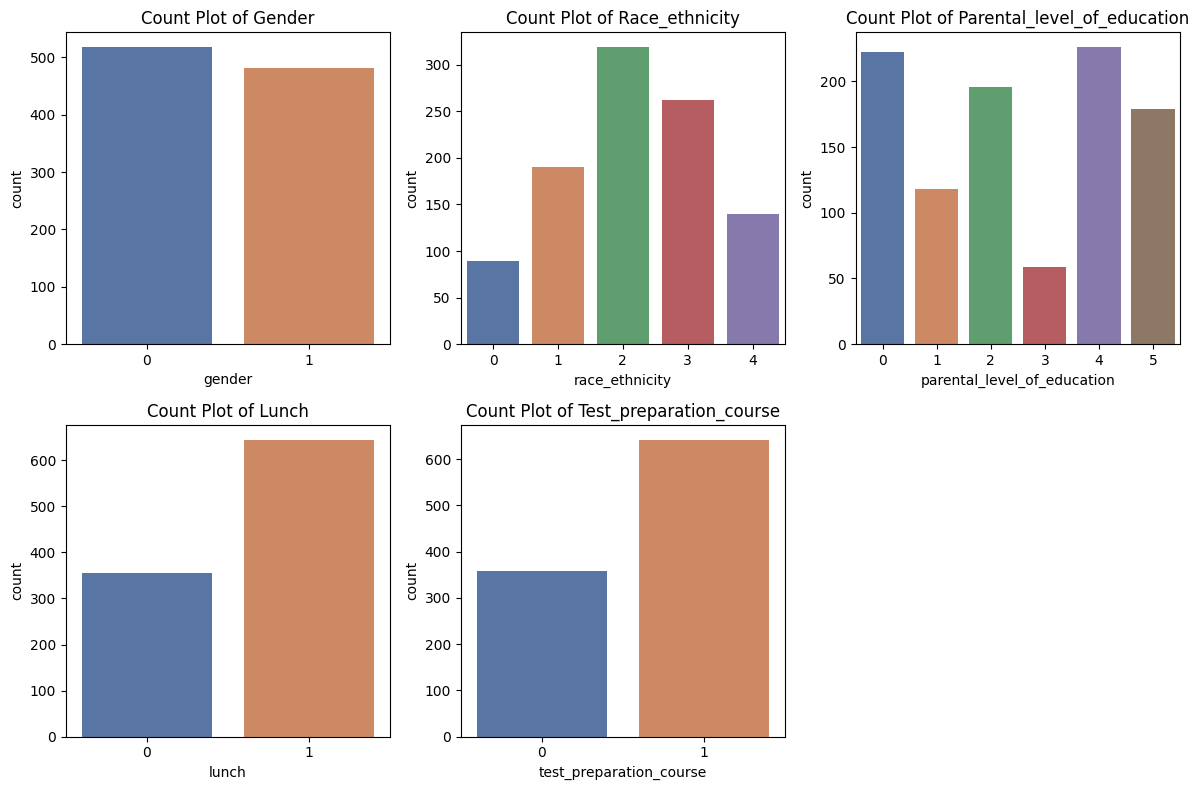

In [ ]:
# Count plots for categorical features
plt.figure(figsize=(12, 8))
for i, column in enumerate(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=data, x=column,palette='deep')
    plt.title(f'Count Plot of {column.capitalize()}')
plt.tight_layout()
plt.show()

<ipython-input-21-ffa0063ee3bf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=column,palette='muted')
<ipython-input-21-ffa0063ee3bf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=column,palette='muted')
<ipython-input-21-ffa0063ee3bf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=column,palette='muted')


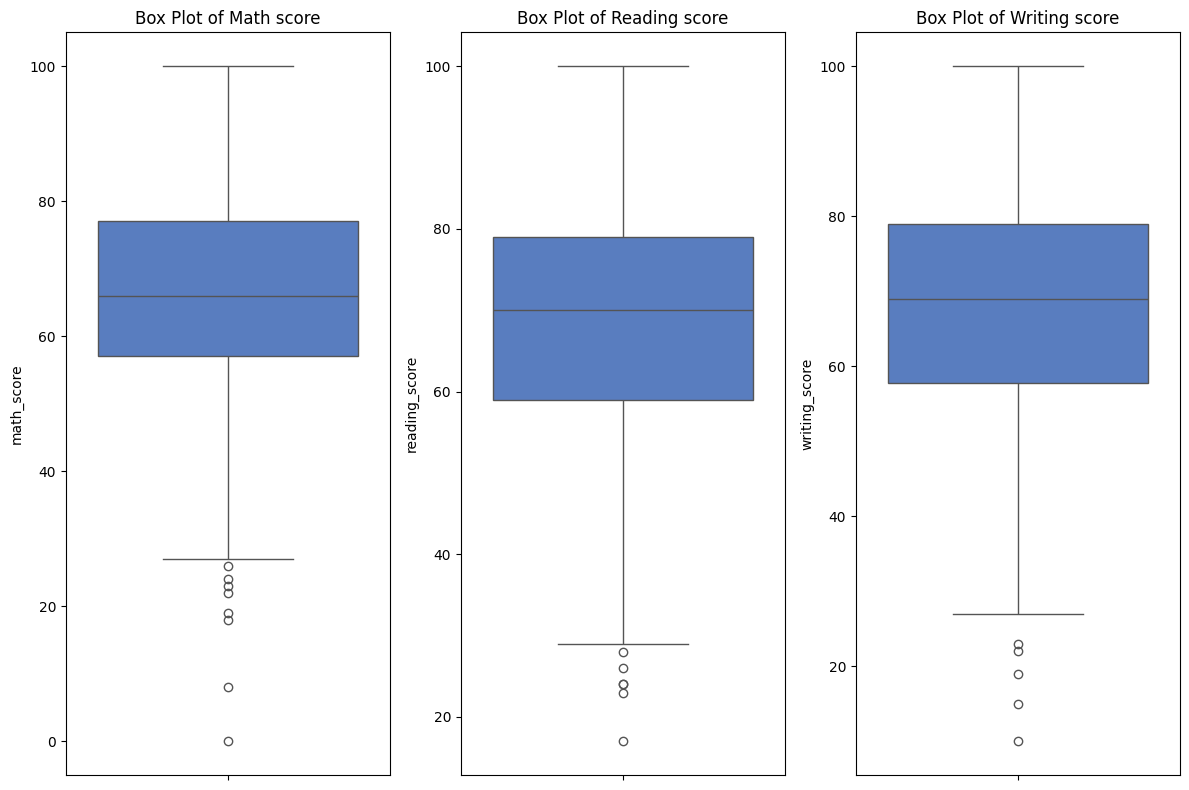

In [ ]:
# Box plots for score distributions
plt.figure(figsize=(12, 8))
for i, column in enumerate(['math_score', 'reading_score', 'writing_score']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=data, y=column,palette='muted')
    plt.title(f'Box Plot of {column.replace("_", " ").capitalize()}')
plt.tight_layout()
plt.show()

# **Linear Regrassion**

In [ ]:
X = data[['reading_score', 'writing_score']]
y = data['math_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = linear_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 7.351308782530512
Root Mean Squared Error: 8.788798451027851


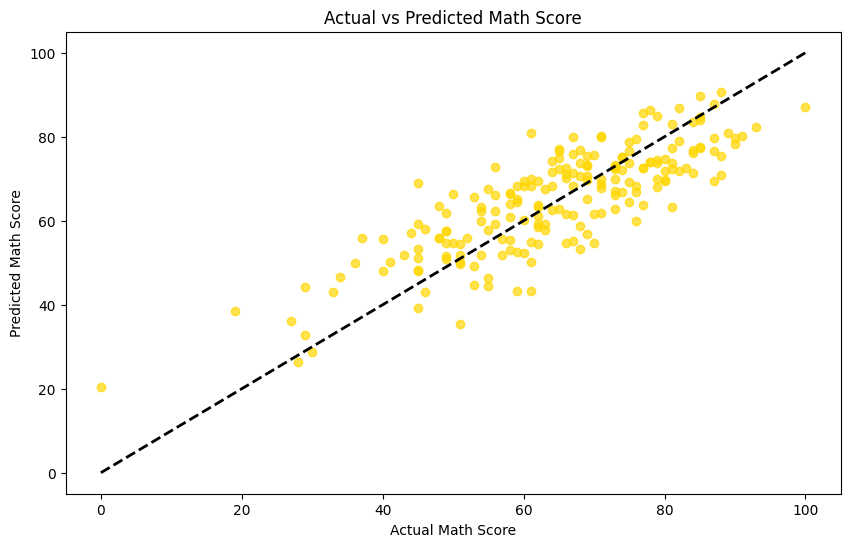

In [ ]:
# Visualization of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7,color='gold')
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs Predicted Math Score')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


# **Logistic Regression**

In [ ]:
# Logistic Regression to predict whether a student scored above average in math
data['high_math_score'] = (data['math_score'] > data['math_score'].median()).astype(int)
X = data[['reading_score', 'writing_score']]
y = data['high_math_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Predictions
y_pred = logistic_model.predict(X_test)



# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.82
Confusion Matrix:
[[83 21]
 [15 81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       104
           1       0.79      0.84      0.82        96

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



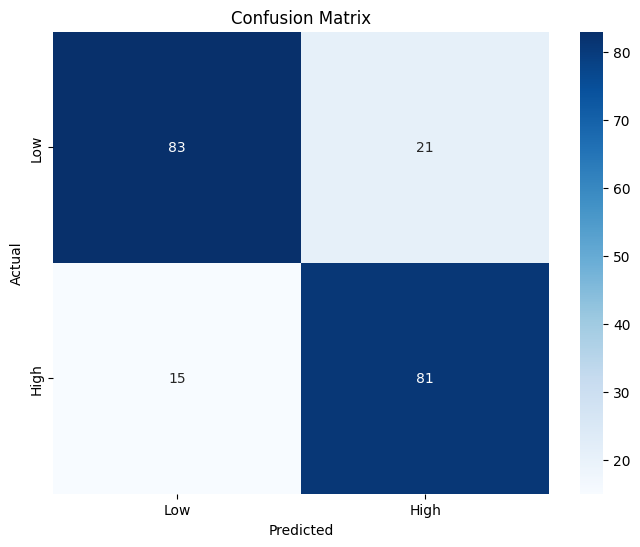

In [ ]:
# Visualization of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
